# Titanic Survival Data
## Data dictionary

- survival - Survival (0 = No, 1 = Yes)
- pclass - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex - Sex	
- Age - Age in years	
- sibsp - No of siblings / spouses aboard the Titanic	
- parch - No of parents / children aboard the Titanic	
- ticket - Ticket number	
- fare - Passenger fare	
- cabin - Cabin number	
- embarked - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Preprocessing

In [2]:
ds = pd.read_csv('train.csv')
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Remove possible unrelated column and bad data column
ds = ds.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis = 1) 

In [4]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [5]:
#Combine column that are related
ds['Family Onboard'] = ds.SibSp.astype(int) + ds.Parch.astype(int)
ds = ds.drop(['SibSp','Parch'],axis=1)

In [6]:
ds.head()

,Survived,Pclass,Sex,Age,Family Onboard
0,0,3,male,22.0,1
1,1,1,female,38.0,1
2,1,3,female,26.0,0
3,1,1,female,35.0,1
4,0,3,male,35.0,0


In [7]:
#Find null column
ds.isnull().sum()

Survived            0
Pclass              0
Sex                 0
Age               177
Family Onboard      0
dtype: int64

In [8]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Survived        891 non-null    int64  
 1   Pclass          891 non-null    int64  
 2   Sex             891 non-null    object 
 3   Age             714 non-null    float64
 4   Family Onboard  891 non-null    int32  
dtypes: float64(1), int32(1), int64(2), object(1)
memory usage: 31.4+ KB


In [9]:
#Replace missing value using simpler imputer with mean strategy
ds['Age'].fillna(ds['Age'].mean(),inplace=True)

In [10]:
ds.isnull().sum()

Survived          0
Pclass            0
Sex               0
Age               0
Family Onboard    0
dtype: int64

## EDA

In [11]:
#Seperate numerical and categorical values
ds_num = ds[['Age', 'Family Onboard']]
ds_cat = ds[['Survived','Pclass','Sex']]

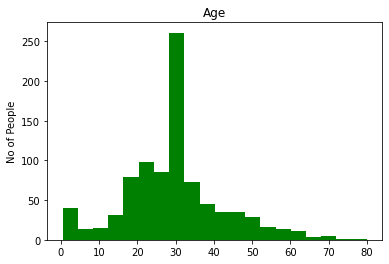

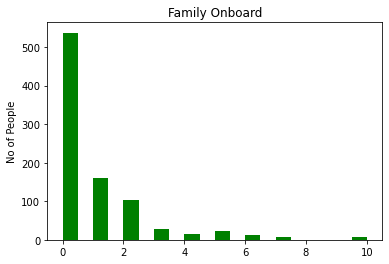

In [12]:
for i in ds_num.columns:
    plt.hist(ds_num[i], color = 'green', bins = 20)
    plt.title(i)
    plt.ylabel('No of People')
    plt.show()

In [13]:
print('Oldest Passenger: ', ds.Age.max())
print(f'Youngest Passenger: {ds.Age.min() * 12} months')
print('Most Passenger Age: ', ds.Age.mode())

Oldest Passenger:  80.0
Youngest Passenger: 5.04 months
Most Passenger Age:  0    29.699118
dtype: float64


- Most of the passenger age is 29 years old. The most oldest passenger is 80 years old while the youngest passenger is 5 month old.
- Most of the passenger does not have and family member or spouse onboard. Maximum no of family member or spouse on bord is 9 people.

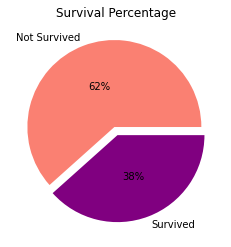

In [14]:
plt.pie(ds.Survived.value_counts(), autopct='%1.0f%%', explode=[0.05]*2, labels = ['Not Survived', 'Survived'], pctdistance=0.5, colors = ['salmon','purple'])
plt.title('Survival Percentage')
plt.show()

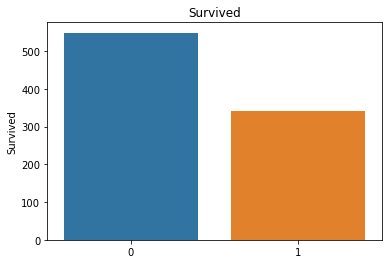

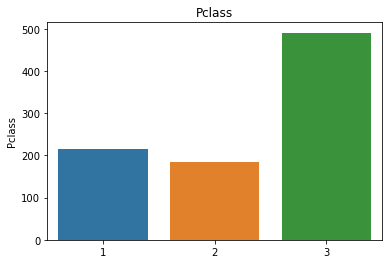

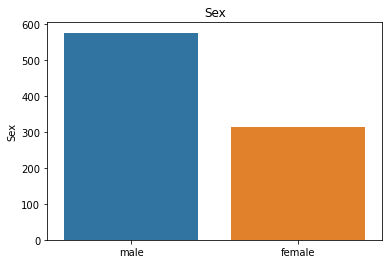

In [15]:
for i in ds_cat.columns:
    sns.barplot(ds_cat[i].value_counts().index, ds_cat[i].value_counts()).set_title (i)
    plt.show()

- From the pie chart, only 38% of the passenger survive the tragedy.
- Most of the passenger is 3rd Class passenger.
- Male passenger is the most passenger for Titanic.

### Visualizing numerical data with output

Text(0.5, 1.0, 'Person with No. of Family Members That Survived')

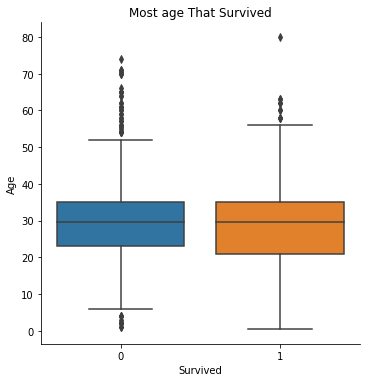

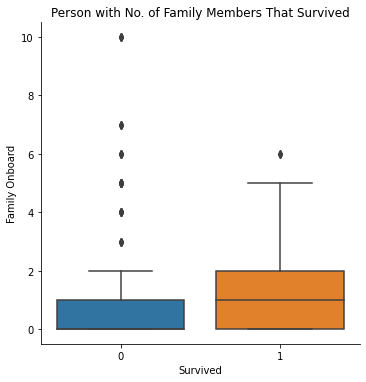

In [16]:
sns.catplot(x='Survived', y ='Age', data = ds, kind = 'box')
plt.title('Most age That Survived')

sns.catplot(x='Survived', y ='Family Onboard', data = ds, kind = 'box')
plt.title('Person with No. of Family Members That Survived')

- Most passenger that survived the tragedy has age range from 20 years old until 35 years old.
- Most passenger that have 0 until 2 family member onboard survived the tragedy while most passenger that have more than 2 family member onboard did not survived the tragedy

### Visualizing categorical data with output

Text(0.5, 1.0, 'Ticket Class That Survived')

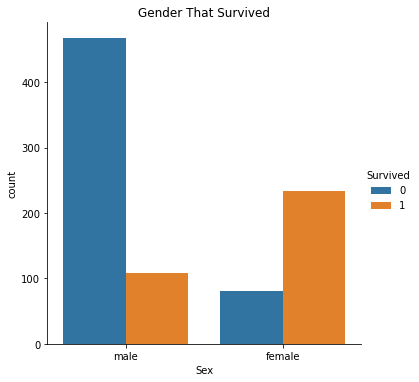

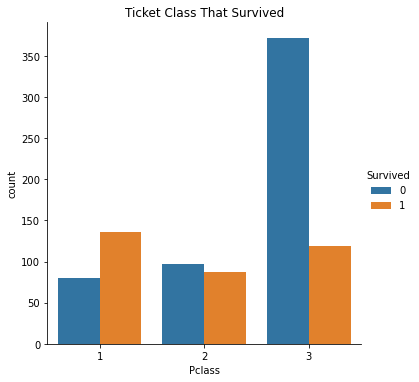

In [17]:
sns.catplot(x = 'Sex', data = ds, kind = 'count', hue = 'Survived')
plt.title('Gender That Survived')

sns.catplot(x = 'Pclass', data = ds, kind = 'count', hue = 'Survived')
plt.title('Ticket Class That Survived')

- Most female passenger survived the tragedy
- First class passenger have the highest percentage of survival rather than second and third class passenger.

## Machine Learning

### Seperate input and ouput variable

In [113]:
X = ds.iloc[:,1:].values
y = ds.iloc[:,0].values
X

array([[3, 'male', 22.0, 1],
       [1, 'female', 38.0, 1],
       [3, 'female', 26.0, 0],
       ...,
       [3, 'female', 29.69911764705882, 3],
       [1, 'male', 26.0, 0],
       [3, 'male', 32.0, 0]], dtype=object)

### Change gender into numeric value using Label Encoder

In [114]:
from sklearn.preprocessing import LabelEncoder

labelencoder_X = LabelEncoder()
X[:, 1] = labelencoder_X.fit_transform(X[:, 1])

X

array([[3, 1, 22.0, 1],
       [1, 0, 38.0, 1],
       [3, 0, 26.0, 0],
       ...,
       [3, 0, 29.69911764705882, 3],
       [1, 1, 26.0, 0],
       [3, 1, 32.0, 0]], dtype=object)

### Seperate data into train and test

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature scaling

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

## Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
classifierNB = GaussianNB()
classifierNB = classifierNB.fit(X_train,y_train)

In [23]:
y_pred = classifierNB.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix

cmNB = confusion_matrix(y_test, y_pred)
print(cmNB)

[[96 14]
 [20 49]]


In [25]:
from sklearn.metrics import accuracy_score
ACC_NB = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_NB)
model_acc={}
model_acc['Naive Bayes'] = ACC_NB

The accurancy score is  81.00558659217877


## Logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression(random_state=0)
classifierLR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = classifierLR.predict(X_test)

In [28]:
cmLR = confusion_matrix(y_test, y_pred)
print(cmLR)

[[97 13]
 [23 46]]


In [29]:
from sklearn.metrics import accuracy_score
ACC_LR = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_LR)
model_acc['Logistic Regression'] = ACC_LR

The accurancy score is  79.88826815642457


## K Nearest Neighbours

In [30]:
from sklearn.neighbors import KNeighborsClassifier

classifierKNN = KNeighborsClassifier(n_neighbors=9, metric='minkowski',p=2)
classifierKNN.fit(X_train,y_train)
y_pred=classifierKNN.predict(X_test)
cmKNN = confusion_matrix(y_test,y_pred)
print(cmKNN)

[[100  10]
 [ 21  48]]


In [31]:
from sklearn.metrics import accuracy_score
ACC_KNN = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_KNN)
model_acc['K Nearest Neighbour'] = ACC_KNN

The accurancy score is  82.68156424581005


## Support Vector Machine

In [32]:
from sklearn.svm import SVC
classifierSVC = SVC(kernel='rbf', random_state=0) #kernel can be changed to increase accurancy
classifierSVC.fit(X_train,y_train)
y_pred = classifierSVC.predict(X_test)
cmSVC = confusion_matrix(y_test,y_pred)
print(cmSVC)

[[99 11]
 [23 46]]


In [33]:
from sklearn.metrics import accuracy_score
ACC_SVC = accuracy_score(y_test, y_pred)*100
print('The accuracy score is ', ACC_SVC)
model_acc['Support Vector Machine'] = ACC_SVC

The accuracy score is  81.00558659217877


## Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier

classifierRFC = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state=0)
classifierRFC.fit(X_train, y_train)
y_pred = classifierRFC.predict(X_test)
cmRFC = confusion_matrix(y_test,y_pred)
print(cmRFC)

[[99 11]
 [21 48]]


In [35]:
from sklearn.metrics import accuracy_score
ACC_RFC = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_RFC)
model_acc['Random Forest Classification'] = ACC_RFC

The accurancy score is  82.12290502793296


## Desicion Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifierDT.fit(X_train, y_train)
y_pred = classifierDT.predict(X_test)
cmDT = confusion_matrix(y_test, y_pred)
print(cmDT)
ACC_DT = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_DT)
model_acc['Decision Tree'] = ACC_DT

[[99 11]
 [22 47]]
The accurancy score is  81.56424581005587


## XGBOOST

In [129]:
import xgboost as xgb

clf= xgb.XGBClassifier(max_depth=3, n_estimators=100, colsample_bytree=1.0, subsample=1.0, learning_rate=0.12)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[13:32:47] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [130]:
cmXG = confusion_matrix(y_test,y_pred)
print(cmXG)

[[102   8]
 [ 22  47]]


In [131]:
ACC_XG = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_XG)
model_acc['XGBoost'] = ACC_XG

The accurancy score is  83.24022346368714


## Artificial Neural Network

In [67]:
import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu')) #input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=10, activation='relu')) #second hidden layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid')) #output layer

In [68]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
23/23 [==============================] - 2s 5ms/step - loss: 0.6708 - accuracy: 0.6517
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6430 - accuracy: 0.6896
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.6168 - accuracy: 0.7289: 0s - loss: 0.6249 - accuracy: 0.71
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5904 - accuracy: 0.7458
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 0.5667 - accuracy: 0.7781
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5454 - accuracy: 0.7893
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.5281 - accuracy: 0.7907
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 0.5131 - accuracy: 0.7921
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4999 - accuracy: 0.7907
Epoch 10/100
23/23 [==============================] - 0s 4ms/step - loss:

23/23 [==============================] - 0s 4ms/step - loss: 0.4109 - accuracy: 0.8287
Epoch 82/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4108 - accuracy: 0.8287
Epoch 83/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8315
Epoch 84/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4101 - accuracy: 0.8301
Epoch 85/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4107 - accuracy: 0.8258
Epoch 86/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4101 - accuracy: 0.8315
Epoch 87/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4101 - accuracy: 0.8301
Epoch 88/100
23/23 [==============================] - 0s 8ms/step - loss: 0.4097 - accuracy: 0.8287
Epoch 89/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4098 - accuracy: 0.8301
Epoch 90/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4102 - accuracy: 0.8301
Epoch 91/100


In [69]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 1],
       [0, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 1],
       [0, 0],
       [1,

In [70]:
cmAnn = confusion_matrix(y_test, y_pred)
print(cmAnn)

[[100  10]
 [ 23  46]]


In [71]:
ACC_Ann = accuracy_score(y_test, y_pred)*100
print('The accurancy score is ', ACC_Ann)
model_acc['Artificial Neural Network'] = ACC_Ann

The accurancy score is  81.56424581005587


## Accuracy score of all model

In [109]:
model_ds = pd.DataFrame.from_dict(model_acc,orient = 'index',columns = ['Accuracy Score'])
model_ds = model_ds.sort_values(by ='Accuracy Score',ascending = False)
model_ds

,Accuracy Score
XGBoost,83.240223
K Nearest Neighbour,82.681564
Random Forest Classification,82.122905
Decision Tree,81.564246
Artificial Neural Network,81.564246
Naive Bayes,81.005587
Support Vector Machine,81.005587
Logistic Regression,79.888268


Text(0.5, 1.0, 'Titanic Model Accuracy Score')

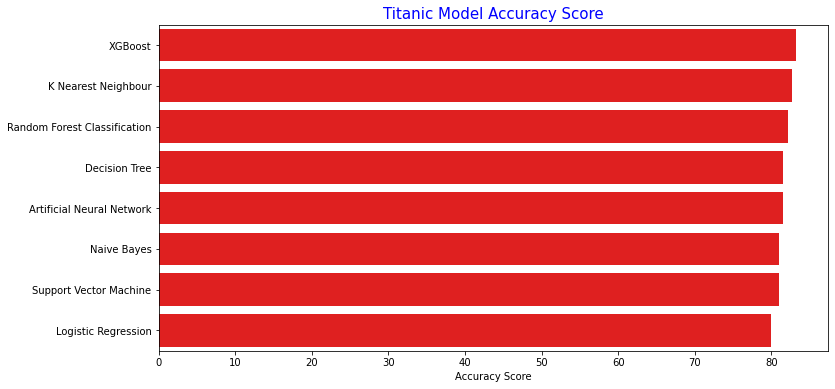

In [110]:
gig,ax = plt.subplots(figsize = (12,6))
sns.barplot(x="Accuracy Score", y=model_ds.index, data=model_ds,color = 'red')
plt.title('Titanic Model Accuracy Score', fontsize=15, color="blue")